In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

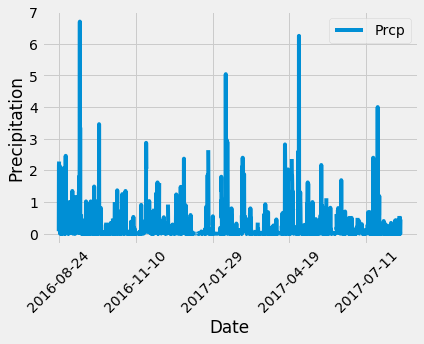

In [12]:
# this is to find the most recent date. from here, we can just take a year prior to see the last 1 year of data.
last_date =session.query(func.max(Measurement.date)).all()

# we can find the last 1 year of date and percipitation data.
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > "2016-08-23").order_by(Measurement.date).all()

# then put it into a df, with the appropriate column names.
df = pd.DataFrame(last_year, columns=['Date','Prcp'])

# Sort the dataframe by date and set date as the index.
df = df.sort_values(by='Date',ascending= True)
df = df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation='45')
plt.ylabel("Precipitation")
plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [46]:
# now we can do a querry on the stations table. To find the number of stations.
total_stations = session.query(func.count(Station.station)).all()
number_of_station = [x[0] for x in total_stations]
print(f"We have a total of {number_station[0]} Stations")

We have a total of 9 Stations


In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# we can query the measurement table to find the count of each station and sort them by how many records.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
#putting the most active station in a list
most_active_station =active_stations[0] 
print(f"The most active station is {most_active_station[0]}")


The most active station is USC00519281


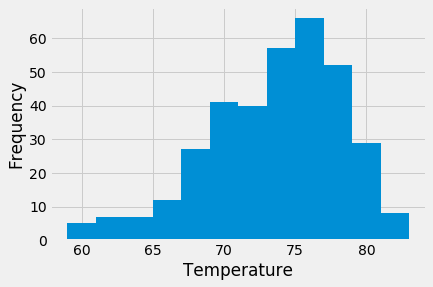

In [55]:
#querying the last 12 months of TOBS
TOBS = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.date > "2016-08-23").order_by(Measurement.station).all()

#querying just the station with the highest number of observations (which is station USC00519281)
Highest_TOBS = session.query(Measurement.tobs).\
        filter(Measurement.date > "2016-08-23").filter(Measurement.station=='USC00519281').all()

#putting it in a list
temp_list = [x[0] for x in Highest_TOBS]

#using panda to plot the histogram. With bins=12
plt.hist(temp_list, bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()